In [1]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from tqdm.notebook import tqdm as tqdm
from tensorflow.keras import Model
from keras.models import Sequential
from sklearn.utils import shuffle
from keras import models, layers
from datetime import datetime
from tensorflow import keras
from keras import backend as K

import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import json
import cv2
import os

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:38: UserWarning: The installed version of bottleneck 0.7.0 is not supported in pandas and will be not be used
The minimum supported version is 1.0.0

  ver=ver, min_ver=_MIN_BOTTLENECK_VERSION), UserWarning)


# Loading Dataset

In [2]:
mapping_data = json.load(open("/root/notebooks/0858611-2/tooth_xray/model/dataset/Dental_Data/PBL/10/mapping.json", "r"))
filter_data  = { path: max(list(map(int, state))) for path, state in mapping_data.items() if max(list(map(int, state))) >= 0 }

In [3]:
def json_2_dataframe_PBL(dataframe, data):
        for path, state in tqdm(data.items()):
                item = { "Path": path, "Class": 0 if state <= 1 else state - 1 }
                dataframe = dataframe.append(item, ignore_index=True)

        return dataframe

PBL_Columns = ["Path", "Class"]
dataset = pd.DataFrame(columns=PBL_Columns)
dataset = json_2_dataframe_PBL(dataset, filter_data)

dataset

Path Class
0      Dental_Data/PBL/10/04-28-09-377_000408 102419 ...     0
1      Dental_Data/PBL/10/04-28-09-397_000408 102419 ...     0
2      Dental_Data/PBL/10/04-28-09-415_000408 102419 ...     0
3      Dental_Data/PBL/10/04-28-09-435_000408 102419 ...     0
4      Dental_Data/PBL/10/04-28-09-452_000408 102419 ...     0
5      Dental_Data/PBL/10/04-28-09-469_000408 102419 ...     0
6      Dental_Data/PBL/10/04-28-09-486_000408 102419 ...     0
7      Dental_Data/PBL/10/04-28-09-502_000408 102419 ...     0
8      Dental_Data/PBL/10/04-28-09-517_000408 102419 ...     0
9      Dental_Data/PBL/10/04-28-09-532_000408 102419 ...     0
10     Dental_Data/PBL/10/04-28-09-547_000408 102419 ...     0
11     Dental_Data/PBL/10/04-28-09-561_000408 102419 ...     0
12     Dental_Data/PBL/10/04-28-09-574_000408 102419 ...     0
13     Dental_Data/PBL/10/04-28-09-587_000408 102419 ...     0
14     Dental_Data/PBL/10/04-28-09-600_000408 102419 ...     0
15     Dental_Data/PBL/10/04-28-09-612_000408 102419 ...     0
16     Dental_Data/PBL/10/04-28-09-624_000408 102419 ...     0
17     Dental_Data/PBL/10/04-28-09-637_000408 102419 ...     0
18     Dental_Data/PBL/10/04-28-09-650_000408 102419 ...     0
19     Dental_Data/PBL/10/04-28-09-664_000408 102419 ...     0
20     Dental_Data/PBL/10/04-28-09-687_000408 102419 ...     0
21     Dental_Data/PBL/10/04-28-09-706_000408 102419 ...     0
22     Dental_Data/PBL/10/04-28-09-725_000408 102419 ...     0
23     Dental_Data/PBL/10/04-28-09-743_000408 102419 ...     0
24     Dental_Data/PBL/10/04-28-09-761_000408 102419 ...     0
25     Dental_Data/PBL/10/04-28-09-779_000408 102419 ...     0
26     Dental_Data/PBL/10/04-28-09-798_000408 102419 ...     0
27     Dental_Data/PBL/10/04-28-09-816_000408 102419 ...     0
28     Dental_Data/PBL/10/04-28-09-834_000408 102419 ...     0
29     Dental_Data/PBL/10/04-28-09-853_000408 102419 ...     0
...                                                  ...   ...
52230  Dental_Data/PBL/10/04-57-15-585_710456 111119 ...     0
52231  Dental_Data/PBL/10/04-57-15-606_710456 111119 ...     0
52232  Dental_Data/PBL/10/04-57-15-627_710456 111119 ...     0
52233  Dental_Data/PBL/10/04-57-15-646_710456 111119 ...     0
52234  Dental_Data/PBL/10/04-57-15-666_710456 111119 ...     0
52235  Dental_Data/PBL/10/04-57-15-686_710456 111119 ...     0
52236  Dental_Data/PBL/10/04-57-15-704_710456 111119 ...     0
52237  Dental_Data/PBL/10/04-57-15-723_710456 111119 ...     0
52238  Dental_Data/PBL/10/04-57-15-744_710456 111119 ...     0
52239  Dental_Data/PBL/10/04-57-15-766_710456 111119 ...     0
52240  Dental_Data/PBL/10/04-57-16-362_710456 111119 ...     1
52241  Dental_Data/PBL/10/04-57-16-382_710456 111119 ...     1
52242  Dental_Data/PBL/10/04-57-16-403_710456 111119 ...     1
52243  Dental_Data/PBL/10/04-57-16-425_710456 111119 ...     1
52244  Dental_Data/PBL/10/04-57-16-447_710456 111119 ...     1
52245  Dental_Data/PBL/10/04-57-16-475_710456 111119 ...     1
52246  Dental_Data/PBL/10/04-57-16-516_710456 111119 ...     1
52247  Dental_Data/PBL/10/04-57-16-540_710456 111119 ...     1
52248  Dental_Data/PBL/10/04-57-16-565_710456 111119 ...     1
52249  Dental_Data/PBL/10/04-57-16-590_710456 111119 ...     1
52250  Dental_Data/PBL/10/04-57-16-614_710456 111119 ...     1
52251  Dental_Data/PBL/10/04-57-16-639_710456 111119 ...     1
52252  Dental_Data/PBL/10/04-57-16-662_710456 111119 ...     1
52253  Dental_Data/PBL/10/04-57-16-686_710456 111119 ...     1
52254  Dental_Data/PBL/10/04-57-16-710_710456 111119 ...     1
52255  Dental_Data/PBL/10/04-57-16-734_710456 111119 ...     1
52256  Dental_Data/PBL/10/04-57-16-759_710456 111119 ...     1
52257  Dental_Data/PBL/10/04-57-16-785_710456 111119 ...     1
52258  Dental_Data/PBL/10/04-57-16-811_710456 111119 ...     1
52259  Dental_Data/PBL/10/04-57-16-837_710456 111119 ...     1

[52260 rows x 2 columns]

# Split dataset and guarantee no data pollution 

In [4]:
# data_num = min(len(dataset[dataset["Class"] == 3]), len(dataset[dataset["Class"] == 2]), len(dataset[dataset["Class"] == 1]), len(dataset[dataset["Class"] == 0]))

data_num = min(len(dataset[dataset["Class"] == 2]), len(dataset[dataset["Class"] == 1]), len(dataset[dataset["Class"] == 0]))

# terrible = dataset[dataset["Class"] == 3]
serious = dataset[dataset["Class"] == 2]
medium  = dataset[dataset["Class"] == 1]
healthy = dataset[dataset["Class"] == 0]

In [5]:
def path_2_images(path_list, resize_setting):
        images = []
        for path in tqdm(path_list):
                image = cv2.imread(path, 0)
                image = cv2.resize(image, resize_setting)
                image = np.reshape(image, (*image.shape, 1))
                images.append(image)
        return np.array(images)

train_range = (0, int( data_num * 0.6 ))
valid_range = (train_range[1], int( data_num * 0.8))
test_range  = (valid_range[1], data_num)

# terrible_train   = terrible.iloc[ train_range[0]: train_range[1], :]
# terrible_valid   = terrible.iloc[ valid_range[0]: valid_range[1], :]
# terrible_test    = terrible.iloc[ test_range[0] : test_range[1] , :]

serious_train   = serious.iloc[ train_range[0]: train_range[1], :]
serious_valid   = serious.iloc[ valid_range[0]: valid_range[1], :]
serious_test    = serious.iloc[ test_range[0] : test_range[1] , :]

medium_train    = medium.iloc[ train_range[0]: train_range[1],  :]
medium_valid    = medium.iloc[ valid_range[0]: valid_range[1],  :]
medium_test     = medium.iloc[ test_range[0] : test_range[1] ,  :]

healthy_train   =  healthy.iloc[ train_range[0]: train_range[1], :]
healthy_valid   =  healthy.iloc[ valid_range[0]: valid_range[1], :]
healthy_test    =  healthy.iloc[ test_range[0] : test_range[1] , :]
 
train_dataset   = pd.concat([healthy_train, medium_train, serious_train])
valid_dataset   = pd.concat([healthy_valid, medium_valid, serious_valid])
test_dataset    = pd.concat([healthy_test , medium_test , serious_test ])

train_dataset = shuffle(train_dataset)
valid_dataset = shuffle(valid_dataset)
test_dataset = shuffle(test_dataset)

resize_setting = (256, 256)

X_train, y_train = path_2_images(train_dataset["Path"], resize_setting), to_categorical(train_dataset["Class"], 3)  
X_val, y_val     = path_2_images(valid_dataset["Path"], resize_setting), to_categorical(valid_dataset["Class"], 3) 
X_test, y_test   = path_2_images(test_dataset ["Path"], resize_setting), to_categorical(test_dataset ["Class"], 3)

In [6]:
print(X_train.shape)

(4788, 256, 256, 1)


In [7]:
train_dataset

Path Class
19933  Dental_Data/PBL/10/04-38-24-537_060011_2 03281...     2
5123   Dental_Data/PBL/10/04-30-13-696_004151 091409 ...     1
12518  Dental_Data/PBL/10/04-34-30-970_026110_1 03051...     1
1791   Dental_Data/PBL/10/04-28-54-331_002456 060517 ...     0
873    Dental_Data/PBL/10/04-28-32-426_000411 112119 ...     0
16433  Dental_Data/PBL/10/04-36-35-685_043521_1 08211...     2
13356  Dental_Data/PBL/10/04-34-53-320_026110_2 06181...     2
1176   Dental_Data/PBL/10/04-28-40-050_001742 082712 ...     2
13269  Dental_Data/PBL/10/04-34-50-923_026110_2 06181...     1
166    Dental_Data/PBL/10/04-28-13-276_000408 102419 ...     0
5278   Dental_Data/PBL/10/04-30-17-363_004151 091409 ...     1
13641  Dental_Data/PBL/10/04-35-02-157_026110_2 06181...     2
3507   Dental_Data/PBL/10/04-29-33-993_003615 010816 ...     1
78     Dental_Data/PBL/10/04-28-11-116_000408 102419 ...     0
12064  Dental_Data/PBL/10/04-34-17-310_025179_2 10121...     2
221    Dental_Data/PBL/10/04-28-15-719_000408 102419 ...     0
581    Dental_Data/PBL/10/04-28-25-307_000411 112119 ...     0
13219  Dental_Data/PBL/10/04-34-49-563_026110_2 06181...     1
11874  Dental_Data/PBL/10/04-34-11-865_025179_1 08251...     1
4686   Dental_Data/PBL/10/04-30-03-714_004151 091409 ...     1
11498  Dental_Data/PBL/10/04-34-00-191_025179_1 08251...     2
13467  Dental_Data/PBL/10/04-34-56-794_026110_2 06181...     1
845    Dental_Data/PBL/10/04-28-31-919_000411 112119 ...     0
13352  Dental_Data/PBL/10/04-34-53-230_026110_2 06181...     2
1641   Dental_Data/PBL/10/04-28-51-118_002456 060517 ...     0
329    Dental_Data/PBL/10/04-28-19-201_000408 102419 ...     0
1828   Dental_Data/PBL/10/04-28-54-946_002456 060517 ...     0
11576  Dental_Data/PBL/10/04-34-02-343_025179_1 08251...     1
1156   Dental_Data/PBL/10/04-28-39-637_001742 082712 ...     0
3515   Dental_Data/PBL/10/04-29-34-110_003615 010816 ...     1
...                                                  ...   ...
178    Dental_Data/PBL/10/04-28-13-506_000408 102419 ...     0
4748   Dental_Data/PBL/10/04-30-05-281_004151 091409 ...     1
547    Dental_Data/PBL/10/04-28-24-754_000411 112119 ...     0
13030  Dental_Data/PBL/10/04-34-45-388_026110_1 03051...     1
18539  Dental_Data/PBL/10/04-37-48-059_051282_3 10291...     2
3933   Dental_Data/PBL/10/04-29-45-555_003615 010816 ...     1
6798   Dental_Data/PBL/10/04-31-48-775_007501 082216 ...     1
1298   Dental_Data/PBL/10/04-28-42-715_001742 082712 ...     1
22     Dental_Data/PBL/10/04-28-09-725_000408 102419 ...     0
1705   Dental_Data/PBL/10/04-28-52-910_002456 060517 ...     0
1375   Dental_Data/PBL/10/04-28-44-308_001742 082712 ...     0
11587  Dental_Data/PBL/10/04-34-02-568_025179_1 08251...     2
12844  Dental_Data/PBL/10/04-34-40-161_026110_1 03051...     2
15984  Dental_Data/PBL/10/04-36-19-099_035015_2 08261...     2
649    Dental_Data/PBL/10/04-28-27-103_000411 112119 ...     0
1540   Dental_Data/PBL/10/04-28-48-801_001742 082712 ...     0
1005   Dental_Data/PBL/10/04-28-36-276_000411 112119 ...     0
13251  Dental_Data/PBL/10/04-34-50-433_026110_2 06181...     1
20332  Dental_Data/PBL/10/04-38-34-732_064768_1 02291...     2
11870  Dental_Data/PBL/10/04-34-11-780_025179_1 08251...     1
1545   Dental_Data/PBL/10/04-28-48-891_001742 082712 ...     0
4694   Dental_Data/PBL/10/04-30-03-890_004151 091409 ...     1
1608   Dental_Data/PBL/10/04-28-50-366_002456 060517 ...     0
19956  Dental_Data/PBL/10/04-38-24-973_060011_2 03281...     2
7377   Dental_Data/PBL/10/04-32-07-933_007501 082216 ...     2
249    Dental_Data/PBL/10/04-28-16-486_000408 102419 ...     0
12048  Dental_Data/PBL/10/04-34-17-039_025179_2 10121...     2
13775  Dental_Data/PBL/10/04-35-07-961_026110_2 06181...     1
1122   Dental_Data/PBL/10/04-28-39-119_001742 082712 ...     0
5241   Dental_Data/PBL/10/04-30-16-574_004151 091409 ...     1

[4788 rows x 2 columns]

In [8]:
def VGG_Net(input_shape, classes):
        model = models.Sequential()
        model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
        model.add(MaxPooling2D((2, 2)))
        
        model.add(Conv2D(256, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        
        #model.add(Conv2D(32, (3, 3), activation='relu'))
        #model.add(MaxPooling2D((2, 2)))
        
        model.add(Flatten())
        model.add(Dense(2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(classes, activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
        
        return model

In [9]:
input_shape= (*resize_setting, 1)
classes    = 3
model = VGG_Net(input_shape, classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 512)     5120      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 512)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 256)     1179904   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       295040    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)       

In [10]:
def plot_result(history):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(16,5))
        
        plt.subplot(121)
        plt.title("Loss")
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label = 'Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='lower right')
        
        plt.subplot(122)
        plt.title("Accuracy")
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.1, 1.5])
        plt.legend(loc='lower right')
        plt.show()

In [11]:
batch_size = 32
epochs     = 50

callback = tf.keras.callbacks.EarlyStopping(
                monitor="val_accuracy",
                min_delta=0.02,
                patience=10,
                verbose=0,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=epochs, batch_size=batch_size)

Train on 4788 samples, validate on 1596 samples
Epoch 1/50
4788/4788 [==============================] - 48s 10ms/step - loss: 1.7699 - accuracy: 0.3459 - val_loss: 1.2016 - val_accuracy: 0.3296
Epoch 2/50
4788/4788 [==============================] - 40s 8ms/step - loss: 1.2619 - accuracy: 0.3782 - val_loss: 1.1431 - val_accuracy: 0.3139
Epoch 3/50
4788/4788 [==============================] - 40s 8ms/step - loss: 1.1374 - accuracy: 0.3908 - val_loss: 1.1588 - val_accuracy: 0.3596
Epoch 4/50
4788/4788 [==============================] - 40s 8ms/step - loss: 1.0950 - accuracy: 0.4177 - val_loss: 1.1653 - val_accuracy: 0.3465
Epoch 5/50
4788/4788 [==============================] - 40s 8ms/step - loss: 1.0591 - accuracy: 0.4396 - val_loss: 1.1777 - val_accuracy: 0.3315
Epoch 6/50
4788/4788 [==============================] - 40s 8ms/step - loss: 1.0329 - accuracy: 0.4728 - val_loss: 1.2033 - val_accuracy: 0.3145
Epoch 7/50
4788/4788 [==============================] - 40s 8ms/step - loss: 1.00

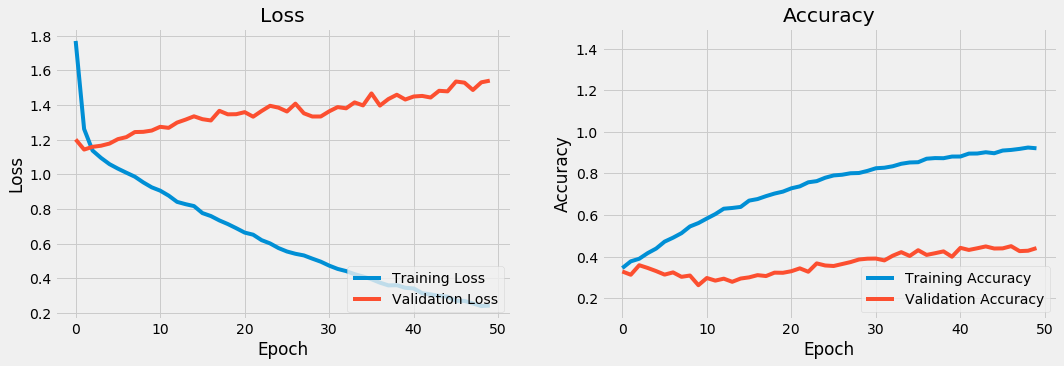

In [12]:
plot_result(history)

Test Loss = 1.369991119344133
Test Acc  = 0.5031328201293945


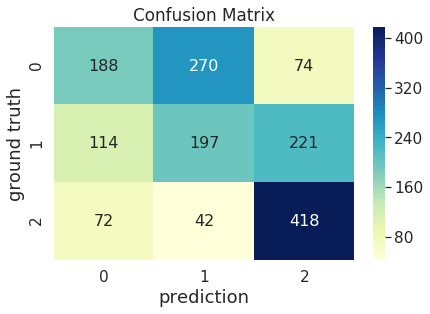

In [13]:
def plot_confusion_matrix(confusion_matrix, classes):
        df_cm = pd.DataFrame(confusion_matrix, range(classes), range(classes))
        sns.set(font_scale=1.4)
        sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='YlGnBu', fmt='g') # font size
        plt.title("Confusion Matrix")
        plt.xlabel('prediction' , fontsize=18)
        plt.ylabel('ground truth', fontsize=18)
        plt.show()

results = model.evaluate(X_test, y_test, verbose=2, batch_size=8)
print("Test Loss = {}\nTest Acc  = {}".format(*results))
prediction = model.predict_classes(X_test, batch_size=8)
y = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y, prediction)
plot_confusion_matrix(confusion, classes)

In [14]:
if not os.path.isfile("CNN_Net.h5"):
        model.save("CNN_Net.h5")

In [15]:
def gradcam(model, x, layer_name):
        preds = model.predict(x)
        pred_class = np.argmax(preds[0])


        # 預測分類的輸出向量
        pred_output = model.output[:, pred_class]
#         preds = model.predict(x) 
        
        pred_output = model.output
        conv_layer = model.get_layer(layer_name)
        grads = K.gradients(pred_output, conv_layer.output)[0]
        pooled_grads = K.sum(grads, axis=(0, 1, 2))
        iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
        pooled_grads_value, conv_layer_output_value = iterate([x])

        for i in range(pooled_grads_value.shape[0]):
                conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])

        heatmap = np.sum(conv_layer_output_value, axis=-1)
    
        return heatmap

def plot_heatmap(heatmaps, image):
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        plt.figure(figsize=(16,5))
        for idx, heatmap in enumerate(heatmaps):
                # ReLU
                heatmap = np.maximum(heatmap, 0)

                # normalize
                heatmap /= np.max(heatmap)
                heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
                heatmap = np.uint8(255 * heatmap)

                plt.subplot(1, 7, idx+1)
                plt.xticks([]), plt.yticks([])
                plt.imshow(image, alpha=0.6)
                plt.imshow(heatmap, cmap='jet', alpha=0.4)
                
        plt.show()

Conv_layers = [ layer.name for layer in model.layers if 'conv' in layer.name ]

same = []
diff = []
for idx, (truth, pred) in enumerate(zip(y, prediction)):
        if truth == pred:
                same.append(idx)
        else:
                diff.append(idx)
same_generator = ( X_test[i] for i in same )
diff_generator = ( X_test[i] for i in diff )

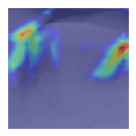

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


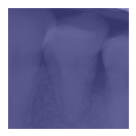

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


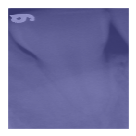

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


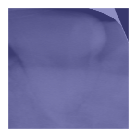

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


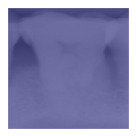

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


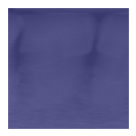

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


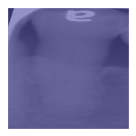

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


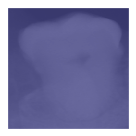

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


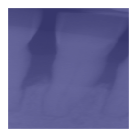

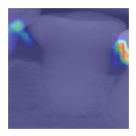

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


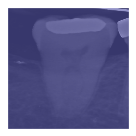

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


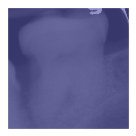

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


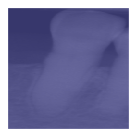

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


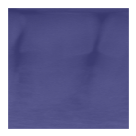

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


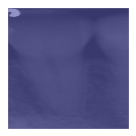

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


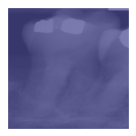

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


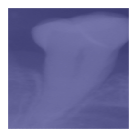

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


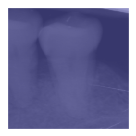

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


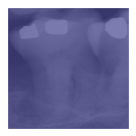

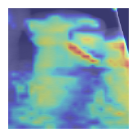

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


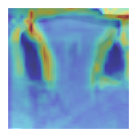

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


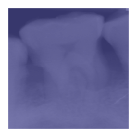

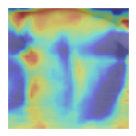

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


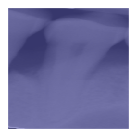

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


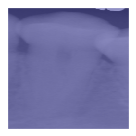

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


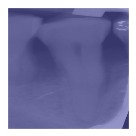

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


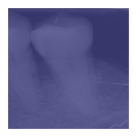

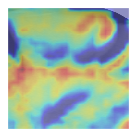

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


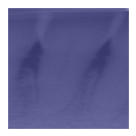

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


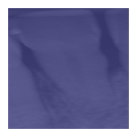

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


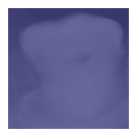

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


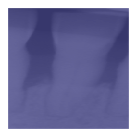

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


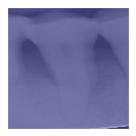

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


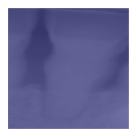

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


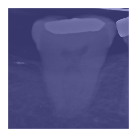

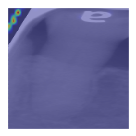

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


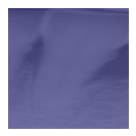

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


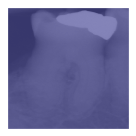

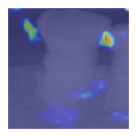

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


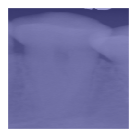

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


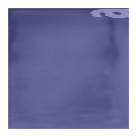

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


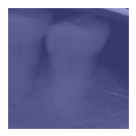

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


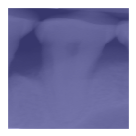

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


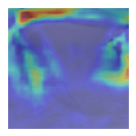

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


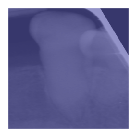

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


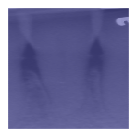

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


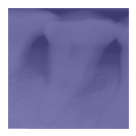

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


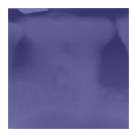

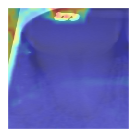

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


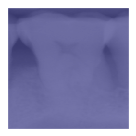

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


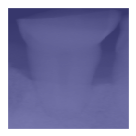

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


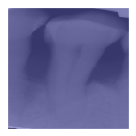

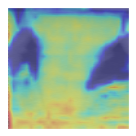

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


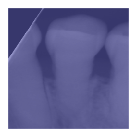

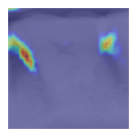

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


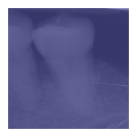

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


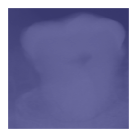

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


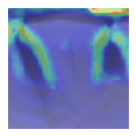

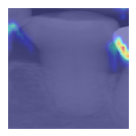

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


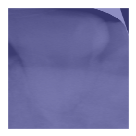

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


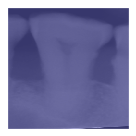

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


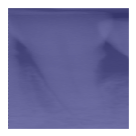

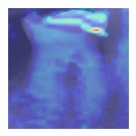

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


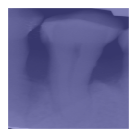

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


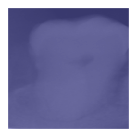

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


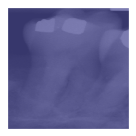

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


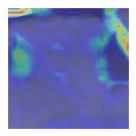

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


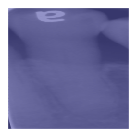

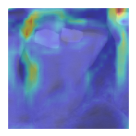

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


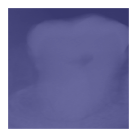

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


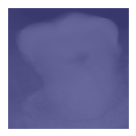

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


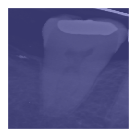

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


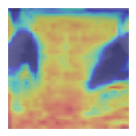

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


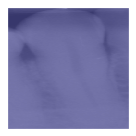

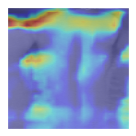

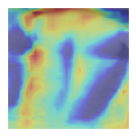

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


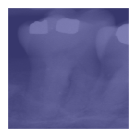

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


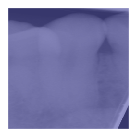

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


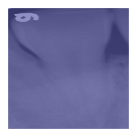

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


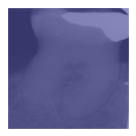

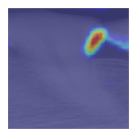

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


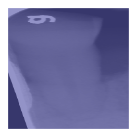

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


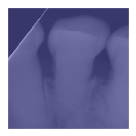

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


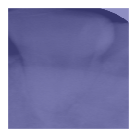

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


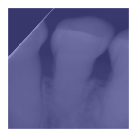

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


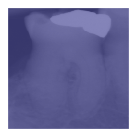

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


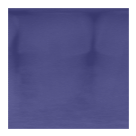

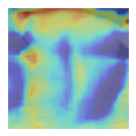

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


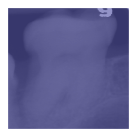

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


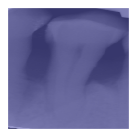

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


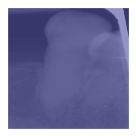

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


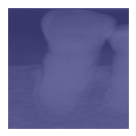

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


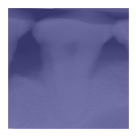

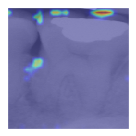

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


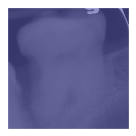

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


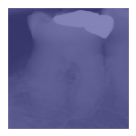

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


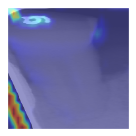

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


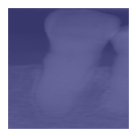

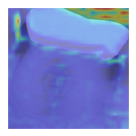

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


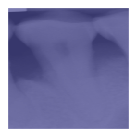

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


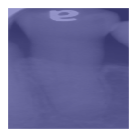

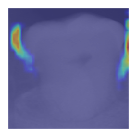

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


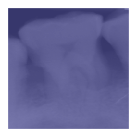

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


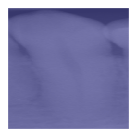

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


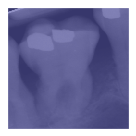

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


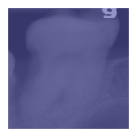

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


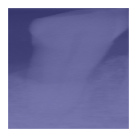

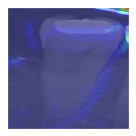

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


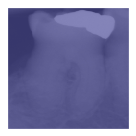

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


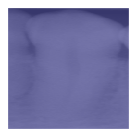

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


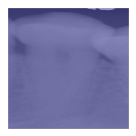

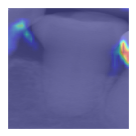

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


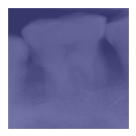

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


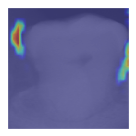

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


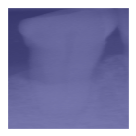

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


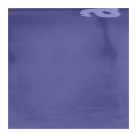

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


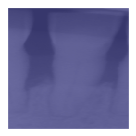

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


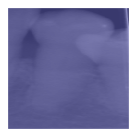

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


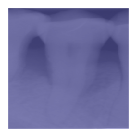

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


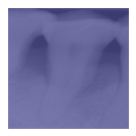

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


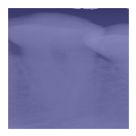

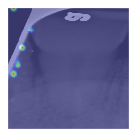

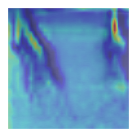

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


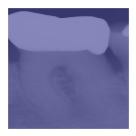

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


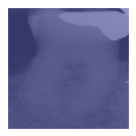

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


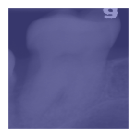

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


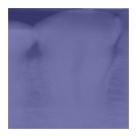

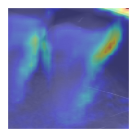

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


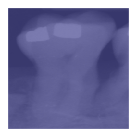

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


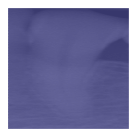

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


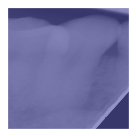

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


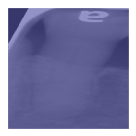

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


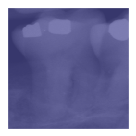

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


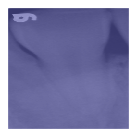

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


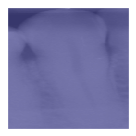

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


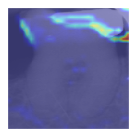

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


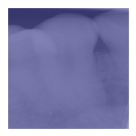

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


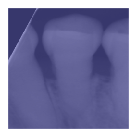

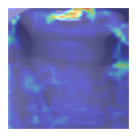

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


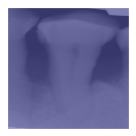

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


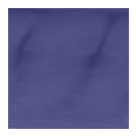

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


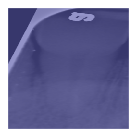

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


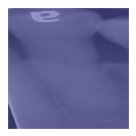

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


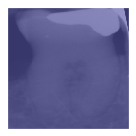

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


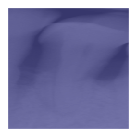

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


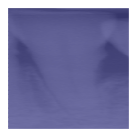

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


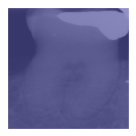

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


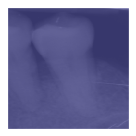

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


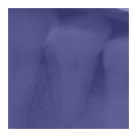

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


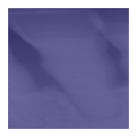

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


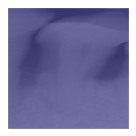

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
for idx, i in enumerate(same_generator):
        heatmaps = [ gradcam(model, i.reshape(1, *resize_setting, 1), Conv_layers[-1]) ]
        plot_heatmap(heatmaps, i)

In [ ]:
for idx, i in enumerate(diff_generator):
        heatmaps = [ gradcam(model, i.reshape(1, *resize_setting, 1), Conv_layers[-1]) ]
        plot_heatmap(heatmaps, i)